In [435]:
import numpy as np
import scipy.stats as ss
import pandas as pd
from sklearn.neighbors import KDTree

%matplotlib inline

def Vk( R,  n):
    if n==1:
        return (2.)*R
    elif n==2:
        return np.pi*R**2.
    elif n==3:
        return (2.**2)*np.pi**1./3.*R**3.
    elif n==4:
        return np.pi**2/2*R**4.
    elif n==5:
        return (2.**3)*np.pi**2./15.*R**5.
    elif n==6:
        return np.pi**3./6.*R**6
    elif n==7:
        return (2.**4)*np.pi**3./105.*R**7.
    elif n==8:
        return np.pi**4./24.*R**8
    elif n==9:
        return (2.**5)*np.pi**4./945.*R**9.
    elif n==10:
        return np.pi**5./120.*R**10.
    elif n in [11,13,15]:
        k = (n-1.)/2.
        return 2*factorial(k)*(4*np.pi)**k/factorial(n)*R**n
    elif n in [12,14,16]:
        k = n/2.
        return np.pi**k/factorial(k)*R**n
    elif n <= 20:
        #Use recurance relation
        return 2.*np.pi*R**2./n*Vk(R, n-2)
    else:
        #Use the high dimensional approximation
        return (n*np.pi)**-0.5*(2.*np.pi*np.e/n)**(n/2.)*R**n

def Sk( R, n):
    if n==0:
        R[:] = 2.
        return R
    else:
        return 2.*np.pi*Vk(np.ones(1, dtype=DTYPE), n)*R

In [1039]:
d=2
n=110
train = ss.multivariate_normal.rvs(cov=np.diag(np.linspace(1.0,0.5,d)), size=n)
# test = ss.multivariate_normal.rvs(cov=np.diag(np.linspace(1.0,0.5,d)), size=70)

kdt = KDTree(train, leaf_size=30, metric='euclidean')
dist, nn = kdt.query(train, k=len(train), return_distance=True)

99


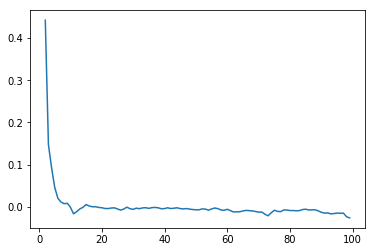

In [1037]:
res = []
for k in range(d,100):
    r = dist[:, k]
#     rp = (dist[:, k+1] - dist[:, k-1])/2
#     rp = (dist[:, k] - dist[:, k-1])
#     rp = (dist[:, k+1] - dist[:, k])
    rp = np.diff(dist[:, k-1:k+2]).mean(axis=1)
    res.append( 1/(k-1) - d * (rp/r).mean() )
print(pd.Series(res, index=range(d,100)).idxmin())
pd.Series(res, index=range(d,100)).plot();

18


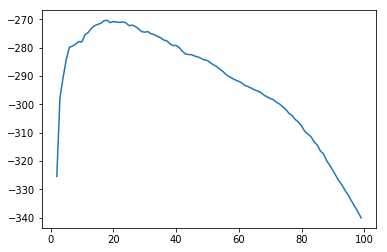

In [1040]:
res = []
for k in range(d,100):
    r = dist[:,k]
    p = (k-1)/(n*Vk(r,d))
    res.append(np.sum(np.log(p)))
print(pd.Series(res, index=range(d,100)).idxmax())
pd.Series(res, index=range(d,100)).plot();

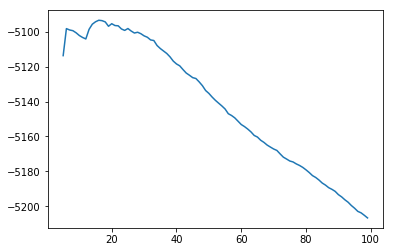